In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('signals.csv')
df.iloc[[0, -1]]

,buy_date,sell_date,symbol,buy_price,sell_price,profit,status
0,2024-10-24,2024-10-28,SNY,51.30,54.18,0.056,Successful
722,2019-02-28,2019-03-07,DLTR,95.55,99.43,0.041,Successful


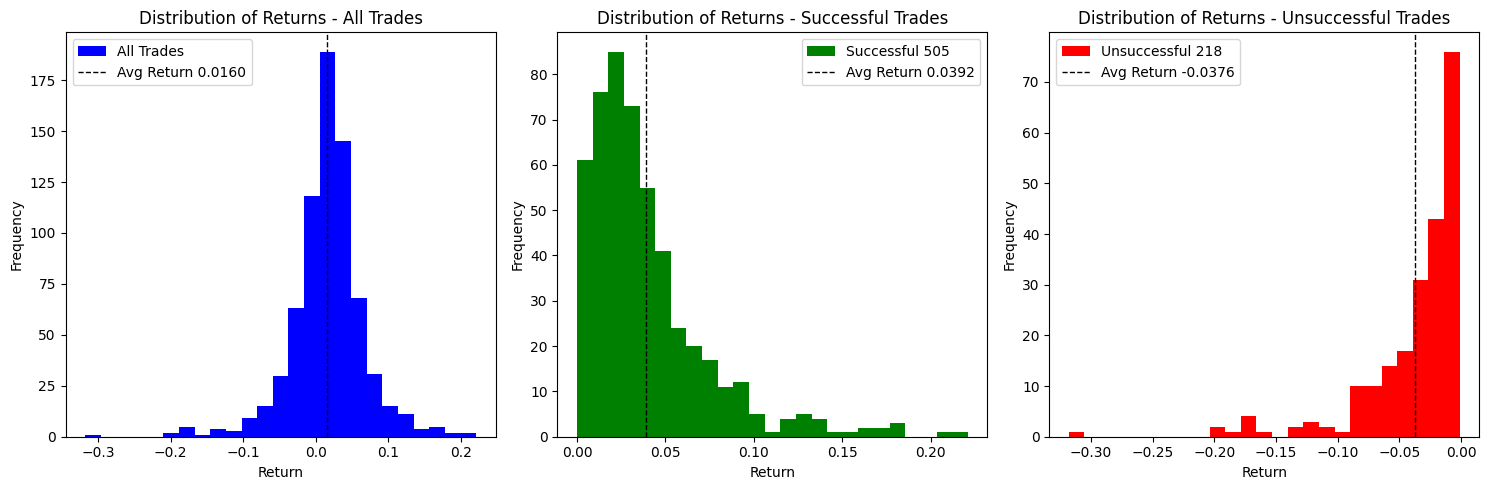

<Figure size 640x480 with 0 Axes>

In [42]:


successful_trades = df[df['status'] == 'Successful']
unsuccessful_trades = df[df['status'] == 'Unsuccessful']
num_successful_trades = len(successful_trades)
num_unsuccessful_trades = len(unsuccessful_trades)

mean_all = df['profit'].mean()
mean_successful = successful_trades['profit'].mean()
mean_unsuccessful = unsuccessful_trades['profit'].mean()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].hist(df['profit'], bins=25, color={'blue'}, label='All Trades')
axes[0].axvline(df['profit'].mean(), color='black', linestyle='dashed', linewidth=1, label=f'Avg Return {mean_all:.4f}')
axes[0].set_xlabel('Return')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Returns - All Trades')
axes[0].legend()

axes[1].hist(successful_trades['profit'], bins=25, color='green', label=f'Successful {num_successful_trades}')
axes[1].axvline(successful_trades['profit'].mean(), color='black', linestyle='dashed', linewidth=1, label=f'Avg Return {mean_successful:.4f}')
axes[1].set_xlabel('Return')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Returns - Successful Trades')
axes[1].legend()


axes[2].hist(unsuccessful_trades['profit'], bins=25, color='red', label=f'Unsuccessful {num_unsuccessful_trades}')
axes[2].axvline(unsuccessful_trades['profit'].mean(), color='black', linestyle='dashed', linewidth=1, label=f'Avg Return {mean_unsuccessful:.4f}')
axes[2].set_xlabel('Return')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Distribution of Returns - Unsuccessful Trades')
axes[2].legend()

plt.tight_layout()
plt.show()





plt.tight_layout()
plt.show()

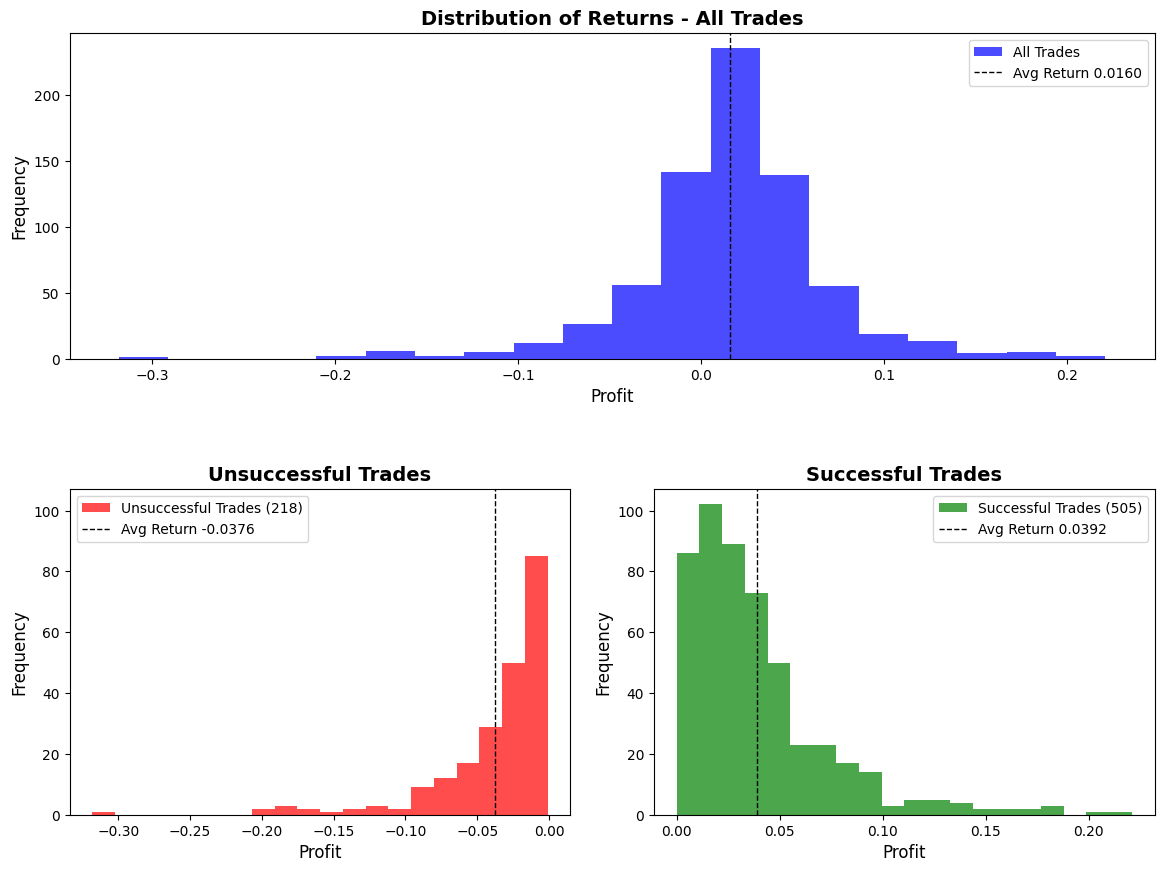

In [72]:



fig = plt.figure(figsize=(14, 22))
grid = plt.GridSpec(4, 4, hspace=0.4, wspace=0.4)
bin = 20

ax_all = fig.add_subplot(grid[0, :]) 
ax_successful = fig.add_subplot(grid[1, 2:4])  
ax_unsuccessful = fig.add_subplot(grid[1, 0:2], sharey=ax_successful)  

ax_all.hist(df['profit'], bins=bin, color='blue', alpha=0.7, label='All Trades')
ax_all.axvline(mean_all, color='black', linestyle='dashed', linewidth=1, label=f'Avg Return {mean_all:.4f}')
ax_all.set_xlabel('Profit', fontsize=12)
ax_all.set_ylabel('Frequency', fontsize=12)
ax_all.set_title('Distribution of Returns - All Trades', fontsize=14, fontweight='bold')
ax_all.legend()


ax_successful.hist(successful_trades['profit'], bins=bin, color='green', alpha=0.7, label=f'Successful Trades ({num_successful_trades})')
ax_successful.axvline(mean_successful, color='black', linestyle='dashed', linewidth=1, label=f'Avg Return {mean_successful:.4f}')
ax_successful.set_xlabel('Profit', fontsize=12)
ax_successful.set_ylabel('Frequency', fontsize=12)
ax_successful.set_title('Successful Trades', fontsize=14, fontweight='bold')
ax_successful.legend()

ax_unsuccessful.hist(unsuccessful_trades['profit'], bins=bin, color='red', alpha=0.7, label=f'Unsuccessful Trades ({num_unsuccessful_trades})')
ax_unsuccessful.axvline(mean_unsuccessful, color='black', linestyle='dashed', linewidth=1, label=f'Avg Return {mean_unsuccessful:.4f}')
ax_unsuccessful.set_xlabel('Profit', fontsize=12)
ax_unsuccessful.set_ylabel('Frequency', fontsize=12)
ax_unsuccessful.set_title('Unsuccessful Trades', fontsize=14, fontweight='bold')
ax_unsuccessful.legend()
plt.savefig('signals.png')

plt.show()




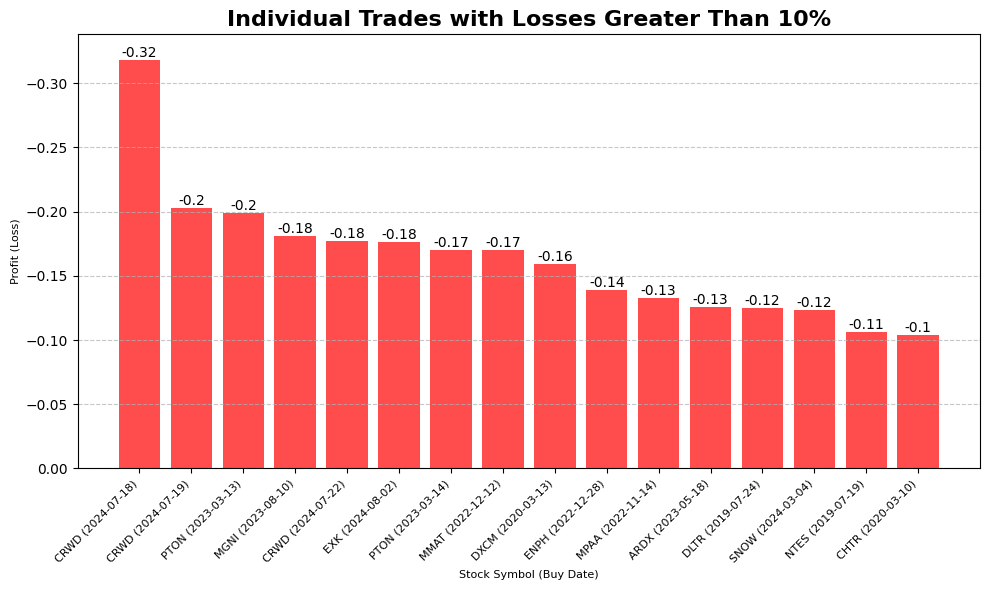

In [85]:

negative_signals = df[df['profit'] < -0.10].sort_values(by='profit')

negative_signals['label'] = negative_signals['symbol'] + " (" + negative_signals['buy_date'] + ")"

plt.figure(figsize=(10, 6))
bars = plt.bar(negative_signals['label'], negative_signals['profit'], color='red', alpha=0.7)

plt.ylim(0, (negative_signals['profit'].min()) - 0.02)


plt.title('Individual Trades with Losses Greater Than 10%', fontsize=16, fontweight='bold')
plt.xlabel('Stock Symbol (Buy Date)', fontsize=8)
plt.ylabel('Profit (Loss)', fontsize=8)
plt.xticks(rotation=45, ha='right', fontsize=8)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.2}", ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/var/folders/dw/yrcz68w12ql24j8spv9vwzp40000gn/T/ipykernel_48811/2929017787.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


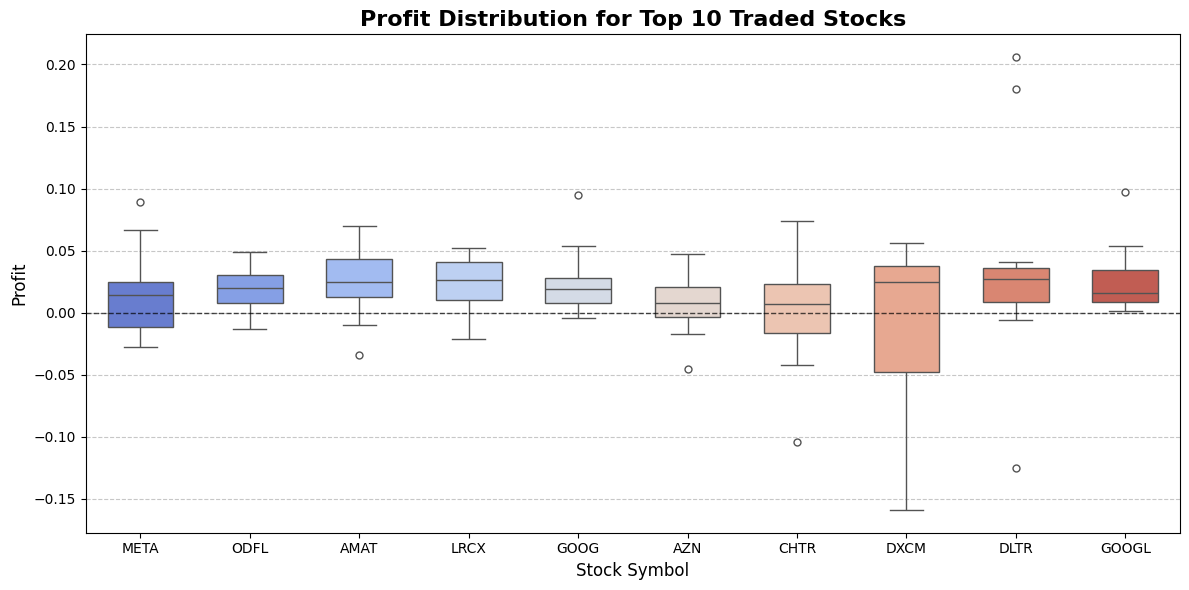

Top 10 Stocks with Highest Number of Trades:


,symbol,total_trades,total_profit,average_profit,min_profit,max_profit
0,META,16,0.228,0.014250,-0.028,0.089
1,ODFL,15,0.300,0.020000,-0.013,0.049
2,AMAT,14,0.355,0.025357,-0.034,0.070
3,LRCX,14,0.322,0.023000,-0.021,0.052
4,GOOG,12,0.297,0.024750,-0.004,0.095
5,AZN,12,0.071,0.005917,-0.045,0.047
6,CHTR,12,0.017,0.001417,-0.104,0.074
7,DXCM,12,-0.059,-0.004917,-0.159,0.056
8,DLTR,11,0.416,0.037818,-0.125,0.206
9,GOOGL,11,0.297,0.027000,0.001,0.097


In [144]:

profitability_by_symbol = df.groupby('symbol').agg(
    total_trades=('profit', 'size'),
    total_profit=('profit', 'sum'),
    average_profit=('profit', 'mean'),
    min_profit=('profit', 'min'),
    max_profit=('profit', 'max')
).sort_values(by='total_profit', ascending=False)
top_traded_stocks = profitability_by_symbol.nlargest(10, 'total_trades')
top_symbols = top_traded_stocks.index
profits_distribution = df[df['symbol'].isin(top_symbols)]

top_traded_stocks_table = top_traded_stocks[['total_trades', 'total_profit', 'average_profit','min_profit', 'max_profit']]
top_traded_stocks_table.reset_index(inplace=True)

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=profits_distribution, 
    x='symbol', 
    y='profit', 
    order=top_symbols, 
    palette='coolwarm', 
    width=0.6, 
    fliersize=5
)
plt.title('Profit Distribution for Top 10 Traded Stocks', fontsize=16, fontweight='bold')
plt.xlabel('Stock Symbol', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.axhline(0, color='black', linestyle='--', linewidth=1, alpha=0.7)  # Add a horizontal line at profit=0
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Top 10 Stocks with Highest Number of Trades:")

top_traded_stocks_table


[*********************100%%**********************]  1 of 1 completed


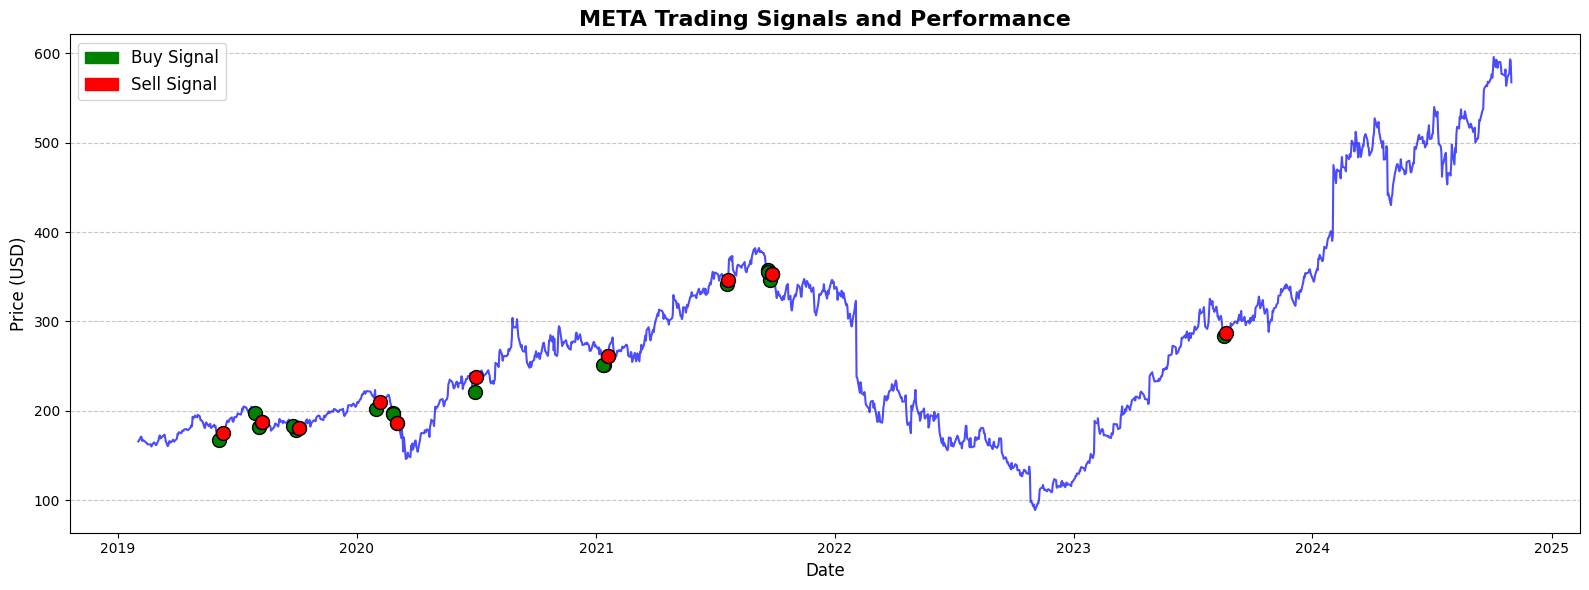

[*********************100%%**********************]  1 of 1 completed


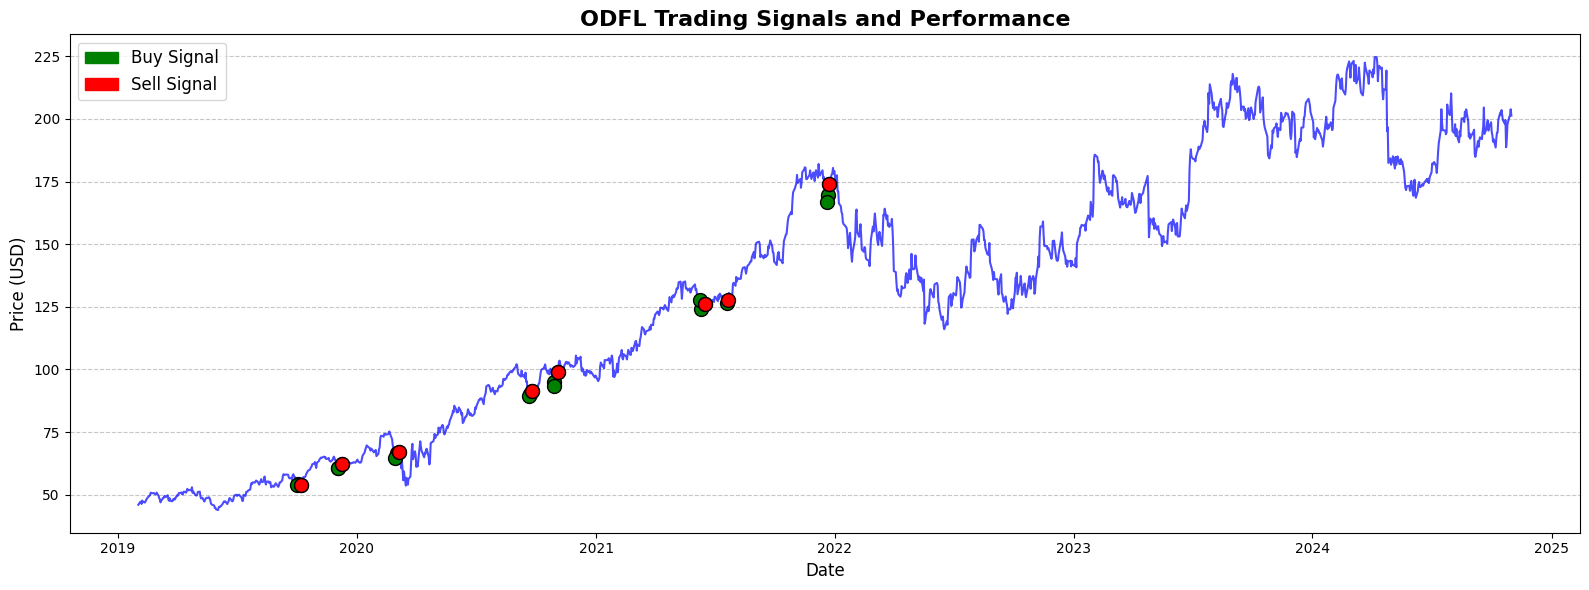

[*********************100%%**********************]  1 of 1 completed


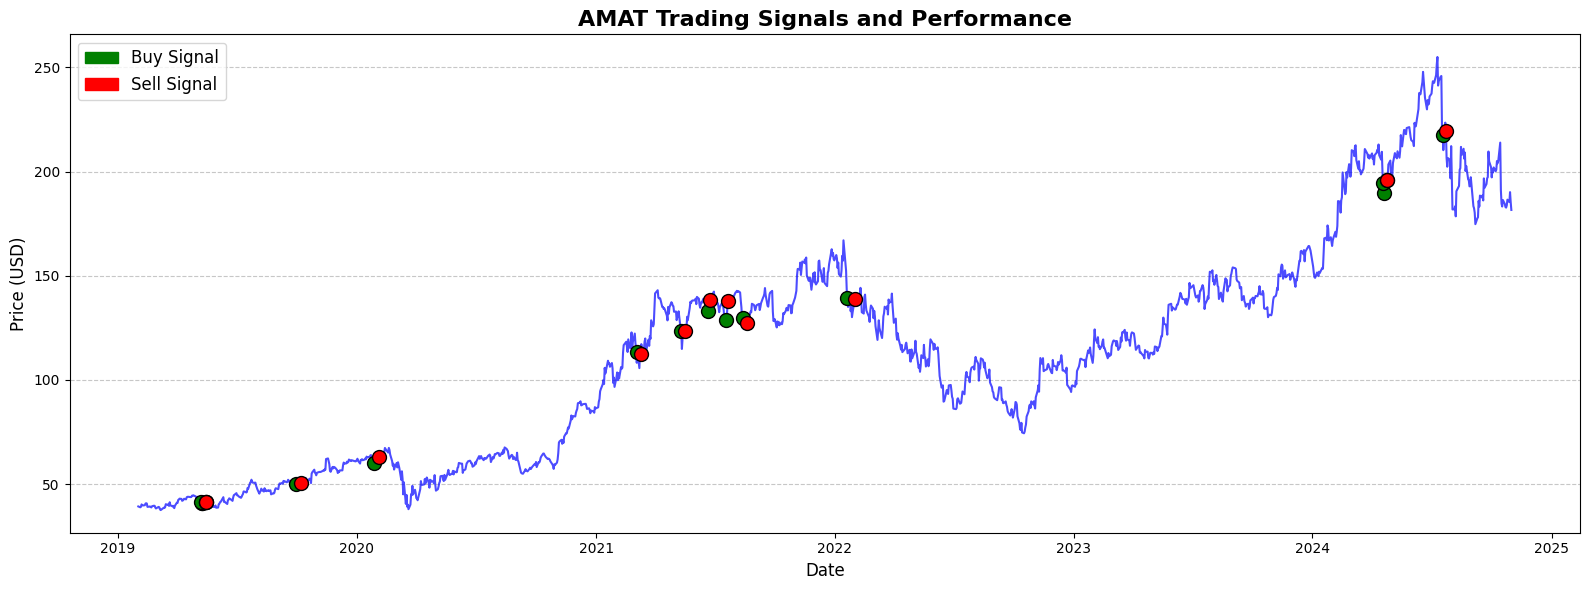

[*********************100%%**********************]  1 of 1 completed


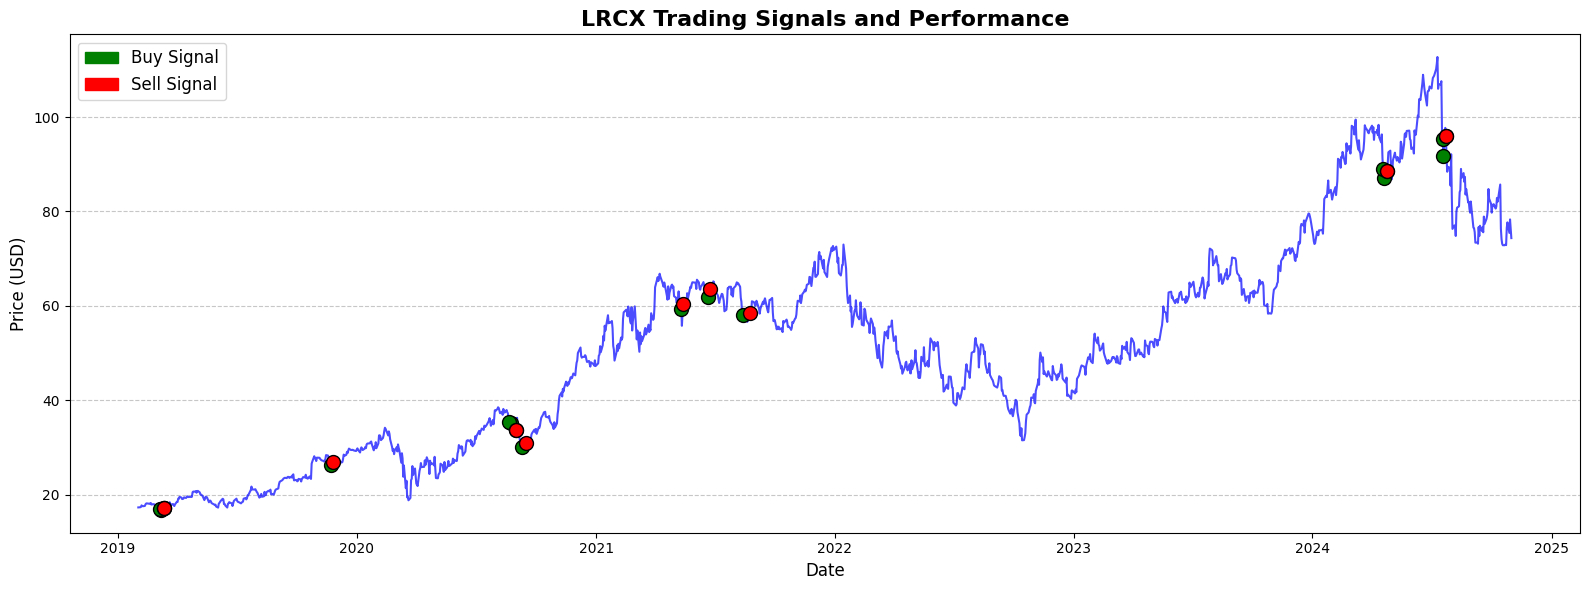

[*********************100%%**********************]  1 of 1 completed


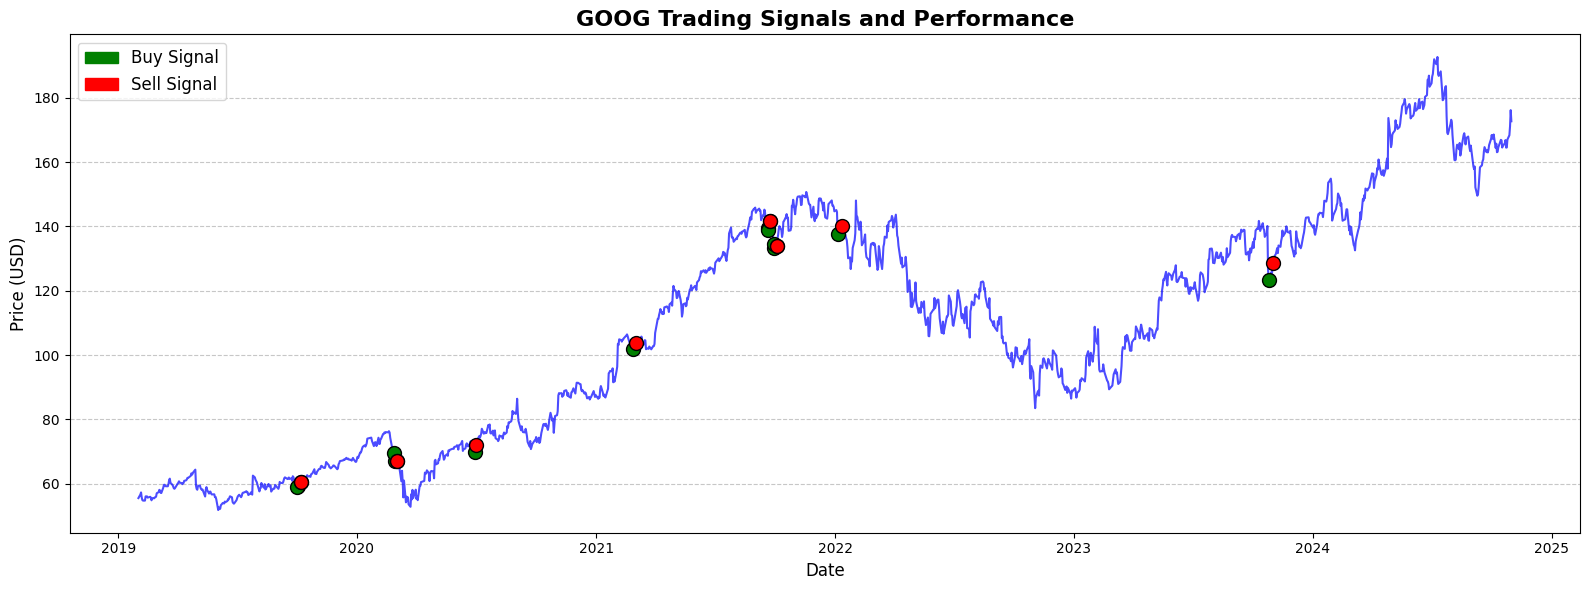

[*********************100%%**********************]  1 of 1 completed


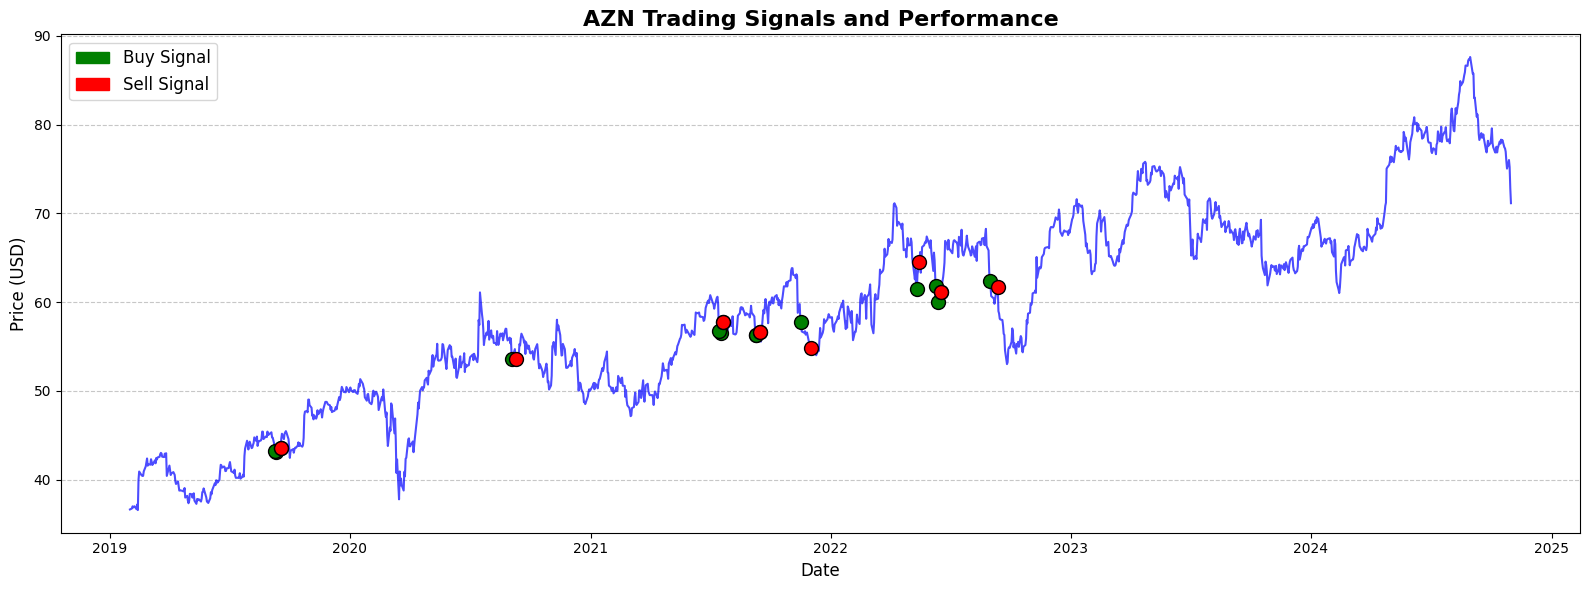

[*********************100%%**********************]  1 of 1 completed


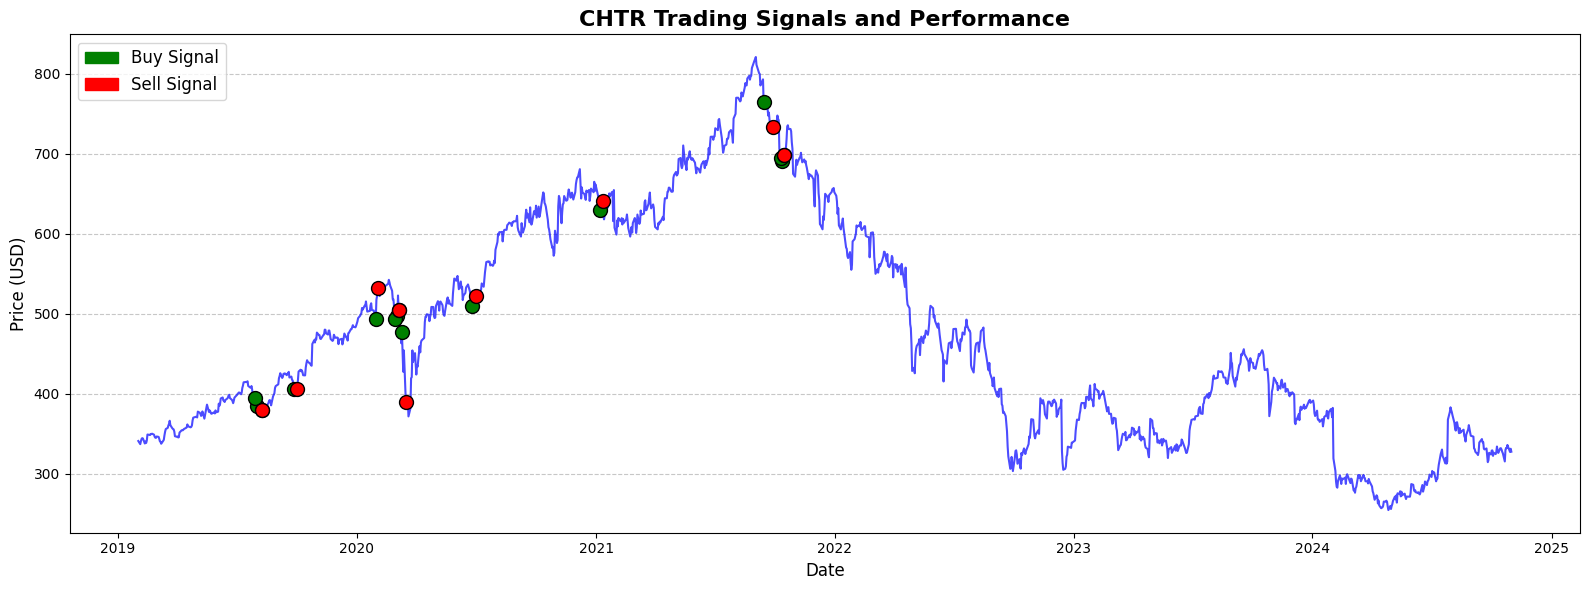

[*********************100%%**********************]  1 of 1 completed


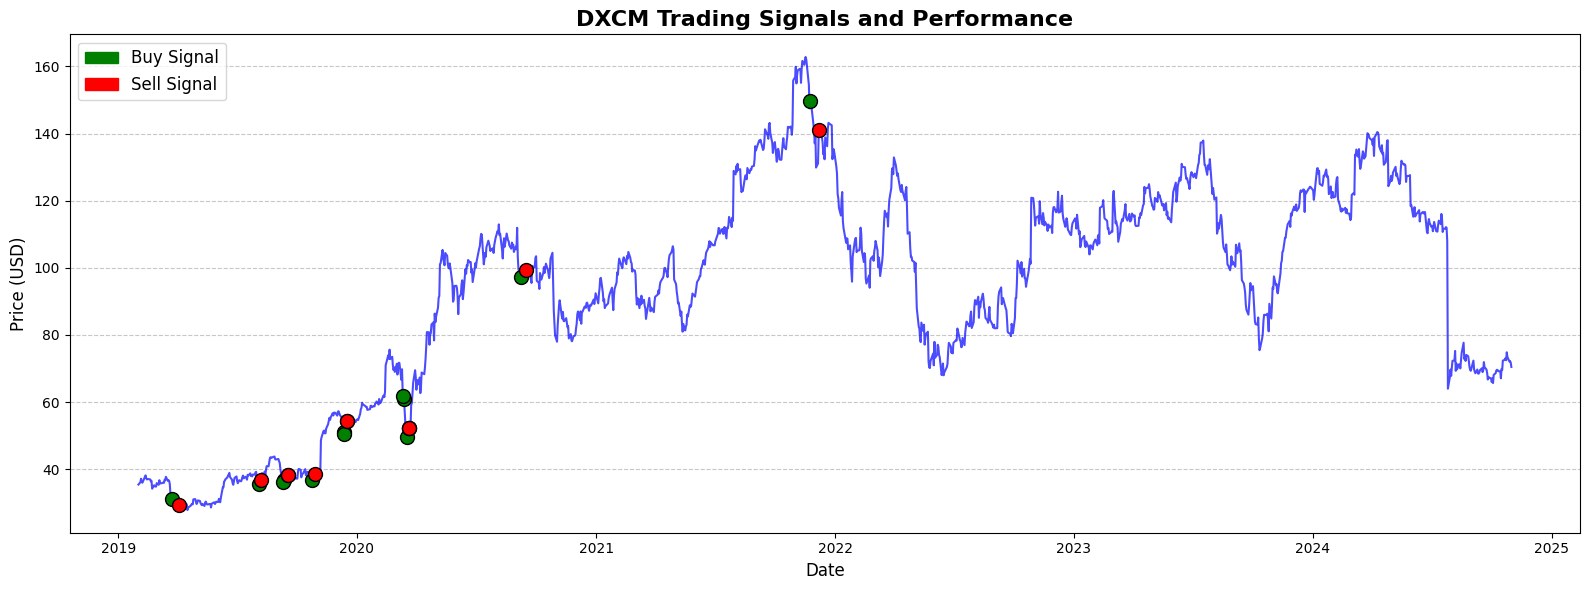

[*********************100%%**********************]  1 of 1 completed


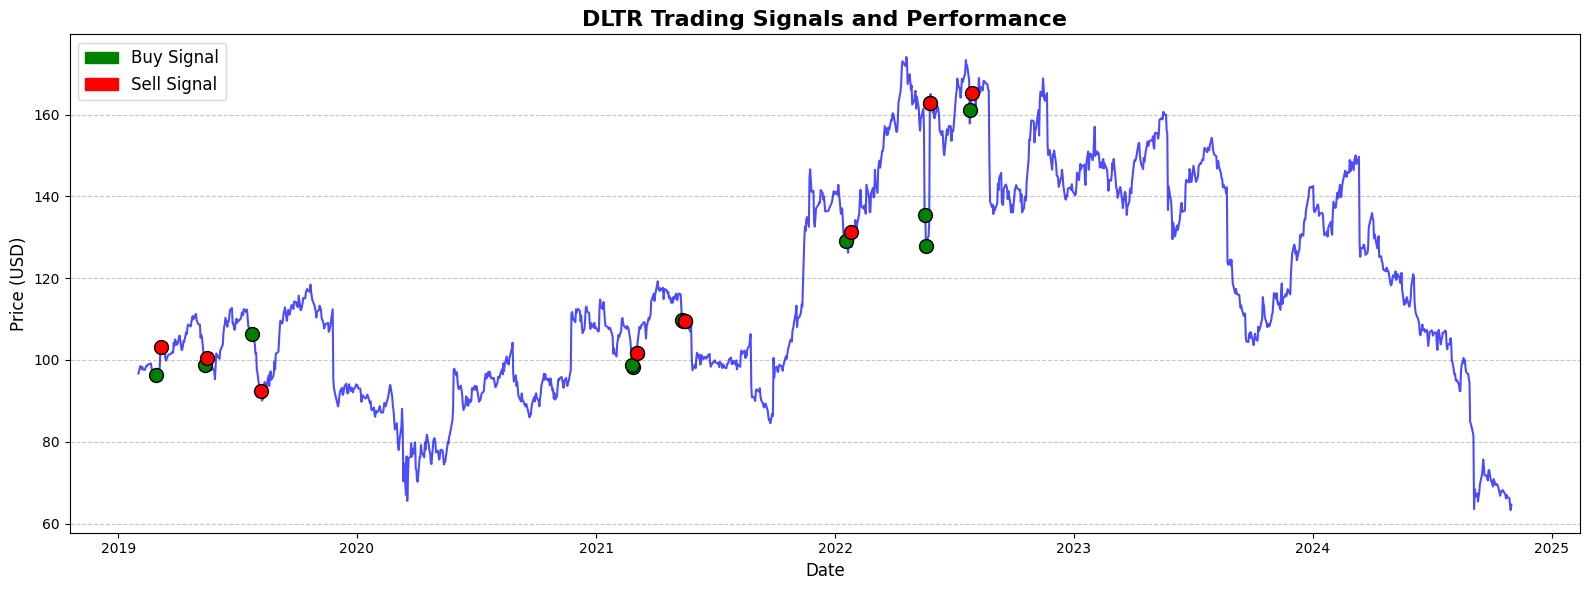

[*********************100%%**********************]  1 of 1 completed


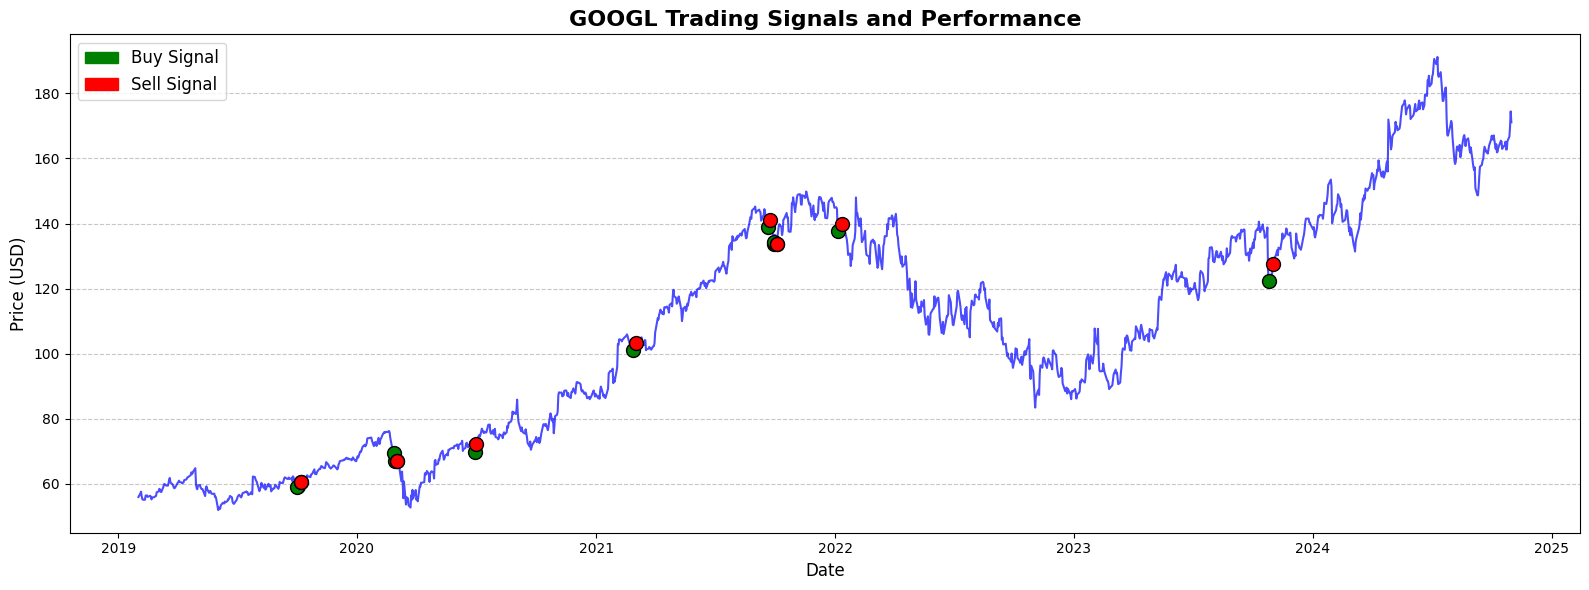

In [147]:
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

def linechart(sym,start='2019-02-01',end='2024-11-01'):
    pr_signals = df[df['symbol'] == sym]
    
    meta_data = yf.download(sym, start, end)
    meta_data.index = pd.to_datetime(meta_data.index)
    
    plt.figure(figsize=(16, 6))
    plt.plot(meta_data['Close'], label=f'{sym} Price', color='blue', alpha=0.7)
    
    for _, row in pr_signals.iterrows():
        buy_date = pd.to_datetime(row['buy_date'])
        if buy_date in meta_data.index:
            plt.scatter(buy_date, meta_data.loc[buy_date, 'Close'], color='green', s=100, edgecolors='black', zorder=5)

    for _, row in pr_signals.iterrows():
        sell_date = pd.to_datetime(row['sell_date'])
        if sell_date in meta_data.index:
            plt.scatter(sell_date, meta_data.loc[sell_date, 'Close'], color='red', s=100, edgecolors='black', zorder=5)

    buy_patch = mpatches.Patch(color='green', label='Buy Signal')
    sell_patch = mpatches.Patch(color='red', label='Sell Signal')
    
    plt.legend(handles=[buy_patch, sell_patch], fontsize=12, loc='upper left')
    
    plt.title(f'{sym} Trading Signals and Performance', fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price (USD)', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

prof = profitability_by_symbol.nlargest(10, 'total_trades').index
for sym in prof:
    linechart(sym)
